## EDA

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train_data_path = "/kaggle/input/playground-series-s4e11/train.csv"
test_data_path = "/kaggle/input/playground-series-s4e11/test.csv"

# Load the CSV file
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path )
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [3]:
train_df.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [4]:
train_df.nunique()

id                                       140700
Name                                        422
Gender                                        2
Age                                          43
City                                         98
Working Professional or Student               2
Profession                                   64
Academic Pressure                             5
Work Pressure                                 5
CGPA                                        331
Study Satisfaction                            5
Job Satisfaction                              5
Sleep Duration                               36
Dietary Habits                               23
Degree                                      115
Have you ever had suicidal thoughts ?         2
Work/Study Hours                             13
Financial Stress                              5
Family History of Mental Illness              2
Depression                                    2
dtype: int64

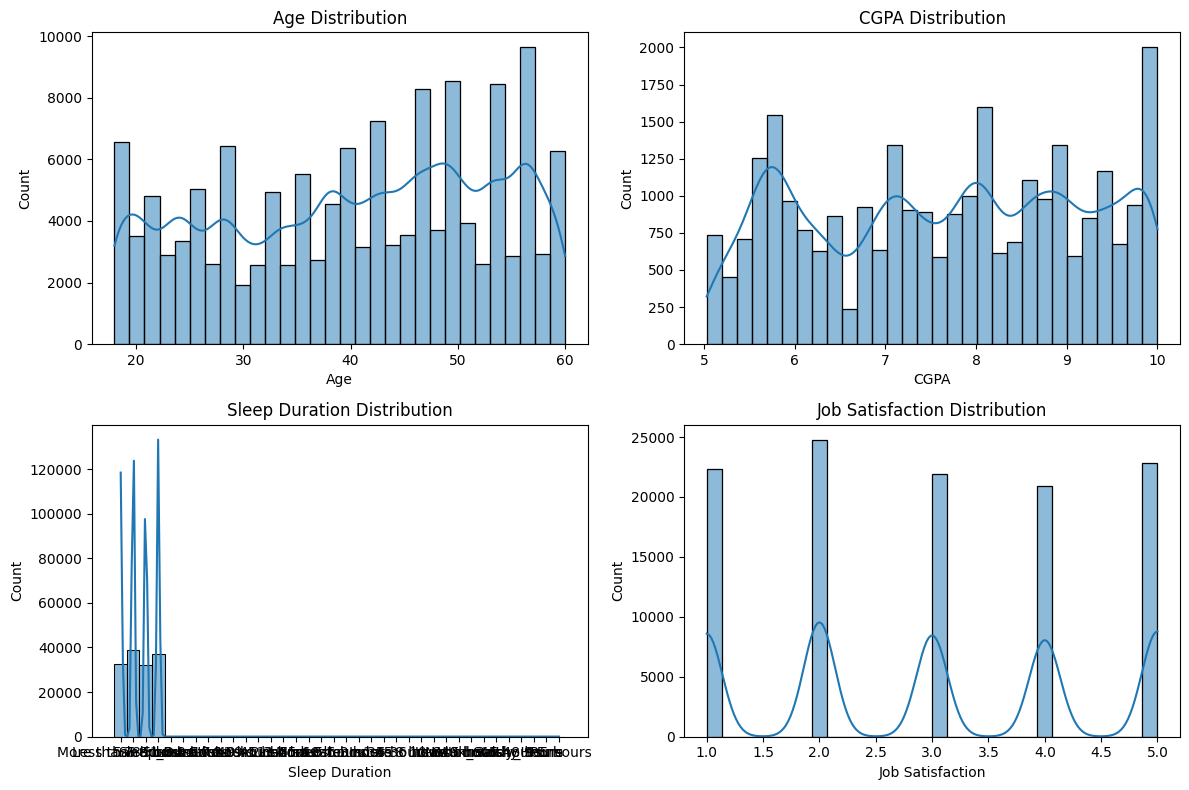

In [5]:
plt.figure(figsize=(12, 8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# CGPA distribution
plt.subplot(2, 2, 2)
sns.histplot(train_df['CGPA'].dropna(), bins=30, kde=True)
plt.title('CGPA Distribution')

# Sleep Duration distribution
plt.subplot(2, 2, 3)
sns.histplot(train_df['Sleep Duration'].dropna(), bins=30, kde=True)
plt.title('Sleep Duration Distribution')

# Job Satisfaction distribution
plt.subplot(2, 2, 4)
sns.histplot(train_df['Job Satisfaction'].dropna(), bins=30, kde=True)
plt.title('Job Satisfaction Distribution')

plt.tight_layout()
plt.show()

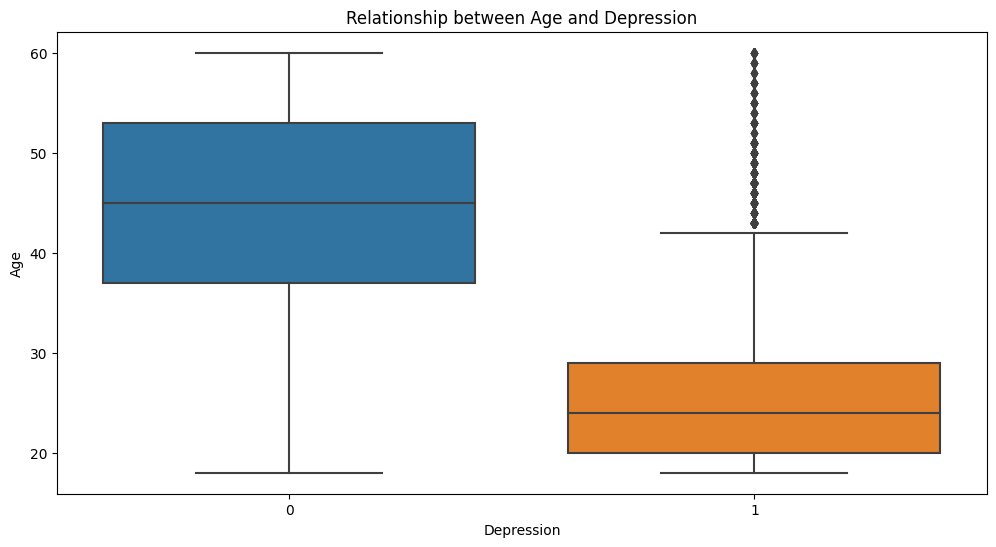

In [6]:
# Analyze the relationship between some variables
plt.figure(figsize=(12, 6))

# Relationship between Age and Depression
sns.boxplot(x='Depression', y='Age', data=train_df)
plt.title('Relationship between Age and Depression')
plt.show()

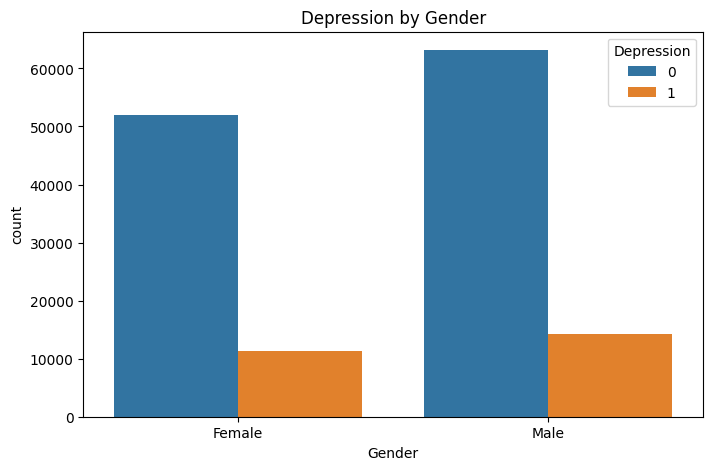

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Depression', data=train_df)
plt.title('Depression by Gender')
plt.show()


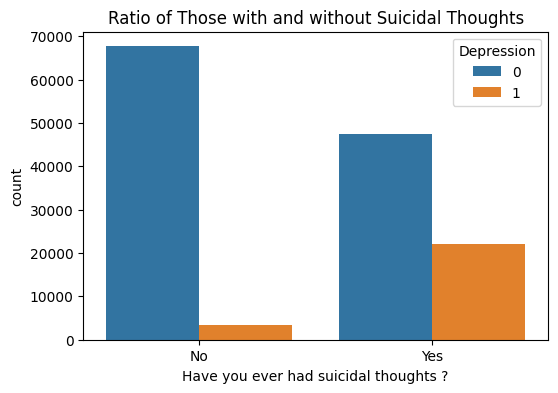

In [8]:
#  Visualize the ratio of those with and without suicidal thoughts
plt.figure(figsize=(6, 4))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=train_df)
plt.title('Ratio of Those with and without Suicidal Thoughts')
plt.show()


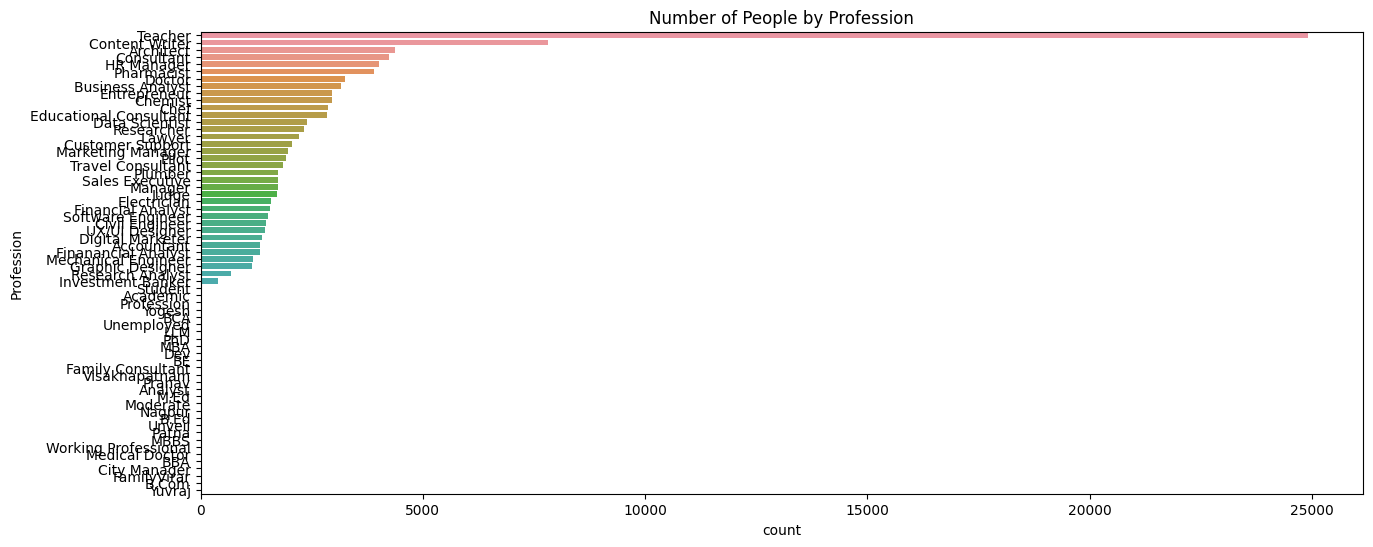

In [9]:
plt.figure(figsize=(15, 6))
sns.countplot(y='Profession', data=train_df, order=train_df['Profession'].value_counts().index)
plt.title('Number of People by Profession')
plt.show()

In [10]:
train_df["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

## PREPARE DATA

In [11]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def map_sleep_duration(value):
    """
    Maps sleep duration strings to numerical values.
    
    Args:
        value (str): The sleep duration string to map.
        
    Returns:
        float: The corresponding numerical value for the sleep duration.
    """
    sleep_duration_mapping = {
        'More than 8 hours': 9,  
        '8-9 hours': 8.5,
        '7-8 hours': 7.5,
        '6-8 hours': 7,
        '6-7 hours': 6.5,
        '5-6 hours': 5.5,
        '4-6 hours': 5,
        'Less than 5 hours': 4,
        '1-2 hours': 1.5,
        '2-3 hours': 2.5,
        '3-4 hours': 3.5,
        '4-5 hours': 4.5,
        '10-11 hours': 10.5, 
        '9-11 hours': 10,  
        '40-45 hours': 0,  
        '45-48 hours': 0,  
        '55-66 hours': 0,  
        '1-6 hours': 3.5,  
        '8 hours': 8,
        'than 5 hours': 6,  
        '49 hours': 0,  
    }
    
    return sleep_duration_mapping.get(value, None)

def clean_dataframe(df):
    """
    Cleans and preprocesses the input DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to clean.
        
    Returns:
        pd.DataFrame: The cleaned DataFrame.
    """
    # Drop unnecessary columns
    df = df.drop(columns=['Academic Pressure', 'CGPA', 'Study Satisfaction'], errors='ignore')

    # Fill numeric columns with the median value
    numeric_columns = ['Work Pressure', 'Job Satisfaction', 'Financial Stress']
    for column in numeric_columns:
        df[column] = df[column].fillna(df[column].median())

    # Fill categorical columns with the mode (most frequent value)
    categorical_columns = ['Dietary Habits', 'Degree']
    for column in categorical_columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    df['Sleep Duration'] = df['Sleep Duration'].apply(map_sleep_duration)

    median_sleep_duration = df['Sleep Duration'].median()
    df['Sleep Duration'] = df['Sleep Duration'].fillna(median_sleep_duration)

    # Encode categorical variables
    label_encoder = LabelEncoder()
    categorical_columns = ['Dietary Habits', 'Gender', 'Degree', 'City',
                           'Working Professional or Student', 
                           'Have you ever had suicidal thoughts ?', 
                           'Family History of Mental Illness', 'Profession']
    
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])

    return df

# Clean both training and testing datasets
train_df_cleaned = clean_dataframe(train_df)
test_df_cleaned = clean_dataframe(test_df)


In [12]:
print("Cleaned Train Data:")
train_df_cleaned.info()
train_df_cleaned.head()

Cleaned Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  int64  
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  int64  
 5   Working Professional or Student        140700 non-null  int64  
 6   Profession                             140700 non-null  int64  
 7   Work Pressure                          140700 non-null  float64
 8   Job Satisfaction                       140700 non-null  float64
 9   Sleep Duration                         140700 non-null  float64
 10  Dietary Habits                      

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,0,49.0,50,1,10,5.0,2.0,9.0,7,33,0,1.0,2.0,0,0
1,1,Vivan,1,26.0,93,1,55,4.0,3.0,4.0,20,63,1,7.0,3.0,0,1
2,2,Yuvraj,1,33.0,97,0,64,3.0,3.0,5.5,7,21,1,3.0,1.0,0,1
3,3,Yuvraj,1,22.0,64,1,55,5.0,1.0,4.0,15,28,1,10.0,1.0,1,1
4,4,Rhea,0,30.0,37,1,9,1.0,1.0,5.5,20,28,1,9.0,4.0,1,0


## MODELING

In [13]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have the cleaned training data train_df_cleaned and test data test_df_cleaned
X = train_df_cleaned.drop(columns=['Depression', 'id', 'Name'], errors='ignore')
y = train_df_cleaned['Depression']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the models
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=150, max_depth=5, learning_rate=0.1)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=150, max_depth=5, learning_rate=0.1)
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=150, max_depth=5, learning_rate=0.1, num_leaves=31, force_col_wise=True)  
cat_model = CatBoostClassifier(random_state=42, n_estimators=150, max_depth=5, learning_rate=0.1, verbose=0)

# Combine the models using a voting classifier
voting_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('lgb', lgb_model),
    ('cat', cat_model)
], voting='soft')  

# Train the voting model
voting_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred = voting_model.predict(X_val_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_val, y_pred))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 20413, number of negative: 92147
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 112560, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181352 -> initscore=-1.507213
[LightGBM] [Info] Start training from score -1.507213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

In [14]:
# Make predictions on the test data
X_test = test_df_cleaned.drop(columns=['id', 'Name'], errors='ignore')
X_test_scaled = scaler.transform(X_test)

# Predict on the test dataset
y_test_pred = voting_model.predict(X_test_scaled)

# Save predictions to a CSV file
predictions_df = pd.DataFrame({
    'id': test_df_cleaned['id'],  
    'Depression': y_test_pred
})

predictions_df.to_csv('predictions_test.csv', index=False)
print("Predictions have been saved to predictions_test.csv")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Predictions have been saved to predictions_test.csv


In [15]:
predictions_df

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1
